We use Deep network to make the boundary for Half moon class. We further use mlxtend library to generate the boundaries for different moons.

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from matplotlib import cm

[0 1 2 3 4 5]


Text(0.5, 1.0, 'Data')

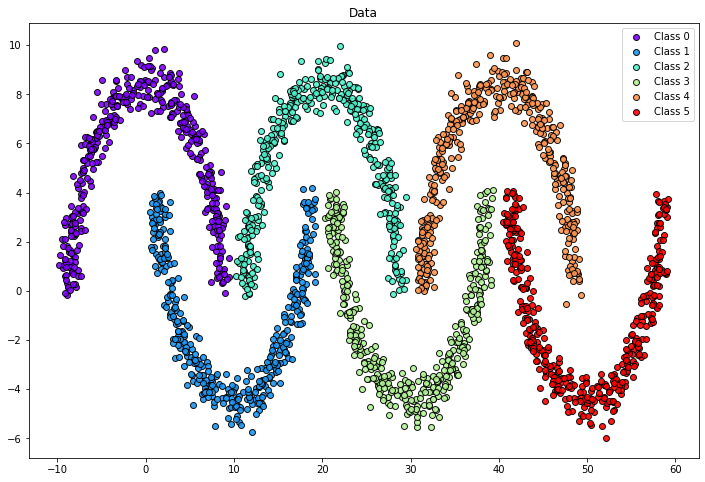

In [2]:
def halfmoon(rad, width, d, half_circle,noise, n_samp): 
     
    Total_samp = n_samp*half_circle*2
    data = np.zeros((Total_samp,2))
    n_m =  int(n_samp) 
    radius = (rad-width/2) + np.random.randn(n_m)*0.5    
    theta = np.pi*np.random.random(n_m)   
    label = np.zeros(Total_samp)  # class labels

    data_x = []
    data_y = []
    list_label = []
    for j in range(2*half_circle):

        ix = range(n_samp*j, n_samp*(j + 1))
        if (j % 2) == 0:
            data[ix,0]  = radius*np.cos(theta) + j*rad + np.random.randn(n_samp)*noise
            data[ix,1]  = radius*np.sin(theta)  + np.random.randn(n_samp)*noise  
            label[ix] = j
        else :
            data[ix,0]  = radius*np.cos(-theta) + j*rad + np.random.randn(n_samp)*noise
            data[ix,1]  = radius*np.sin(-theta) - d*2 + np.random.randn(n_samp)*noise
            label[ix] = j
    label = label.astype('int32')  
    return data,label
dataNum = 400
radius=10
half_circle = 3
width = 3
gap_d = -2
noise = 0.2
X, y = halfmoon(radius,width,gap_d, half_circle, noise,dataNum)
plt.figure(figsize=(12, 8))

y_unique = np.unique(y)
print(y_unique)
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1],
                c=color[np.newaxis, :],
                alpha=0.9, edgecolor='k',
                label="Class %s" % this_y)
plt.legend(loc="best")
plt.title("Data")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape, y_train.shape); print(X_test.shape)
y_out = len(np.unique(y))
# Set the input shape
feature_vector_shape = len(X[0])
input_shape = (feature_vector_shape,)
print(f'Feature shape: {input_shape}')
print(y_test[0])

(1920, 2) (1920,)
(480, 2)
Feature shape: (2,)
5


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
#    keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(y_out)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 13,190
Trainable params: 13,190
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)
# training
batch_size = 32
epochs = 50
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=0, validation_split = 0.2);

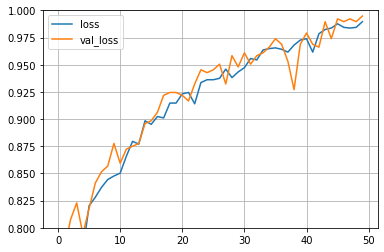

In [6]:
def plot_loss(history):
    plt.plot(history.history['accuracy'], label='loss')
    plt.plot(history.history['val_accuracy'], label='val_loss')
    plt.ylim([0.8, 1])
    plt.legend()
    plt.grid(True)
plot_loss(history)

One hot encoding is used for the boundary plotting.

In [7]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
keras_model_no_ohe = Onehot2Int(model)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


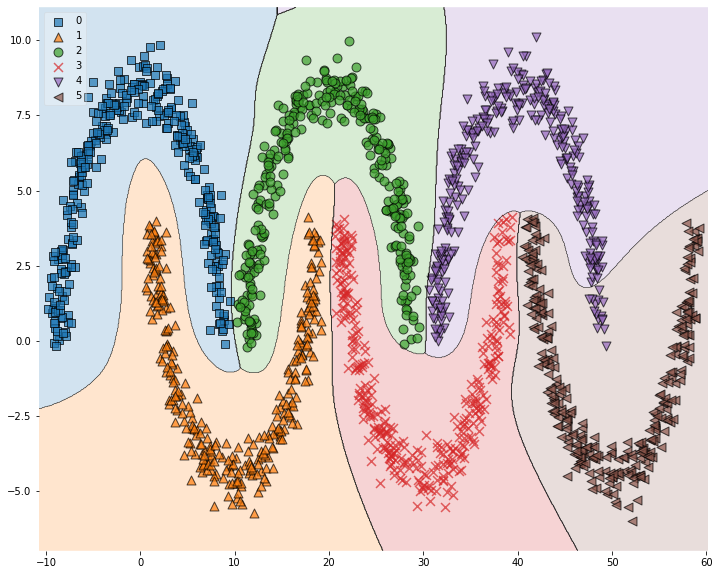

In [8]:
# Plot decision boundary
contourf_kwargs = {'alpha': 0.2}
scatter_kwargs = {'s': 80, 'alpha': 0.7}
scatter_highlight_kwargs = {'s': 40, 'label': 'Test data', 'alpha': 0.5}
fig = plt.figure(figsize=(12,10))
plot_decision_regions(X_train, y_train, clf=keras_model_no_ohe, legend=2, contourf_kwargs = contourf_kwargs, 
                      scatter_kwargs=scatter_kwargs)#, X_highlight=X_test, scatter_highlight_kwargs= scatter_highlight_kwargs)
plt.show()